# Simulate the Monty Hall Problem

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

plt.style.use('seaborn-v0_8-deep')
%matplotlib inline
%config InlineBackend.figure_format='retina'

Simulate three doors

In [2]:
D = np.zeros(3)                    # goat = 0
D[np.random.randint(0, 3)] = 1     # car = 1

In [3]:
print(D)

[1. 0. 0.]


Simulate the three players

In [4]:
def montyhall(N):

    victories = np.zeros(3)
    
    for i in range(N):
        P1 = np.random.randint(0, 3) # The conservative keep its choice
        
        if P1 == 0:
            if D[1] == 0:                                          # I open one door with the goat
                P2 = 2                                             # the switcher takes the other one left
                P3 = 2 if np.random.randint(0, 2) == 1 else 0      # the newcomer takes RANDOMLY one of the two left 
                
            else:
                P2 = 1
                P3 = np.random.randint(0, 2)
        
        elif P1 == 1:
            if D[0] == 0:
                P2 = 2
                P3 = np.random.randint(1, 3)
            else:
                P2 = 0
                P3 = np.random.randint(0, 2)
        
        elif P1 == 2:
            P3 = np.random.randint(0, 2)
            if D[0] == 0:
                P2 = 1
                P3 = np.random.randint(1, 3)
            else:
                P2 = 0
                P3 = 2 if np.random.randint(0, 2) == 1 else 0
        
        if D[P1] == 1: victories[0] +=1
        if D[P2] == 1: victories[1] +=1
        if D[P3] == 1: victories[2] +=1

    return(victories)

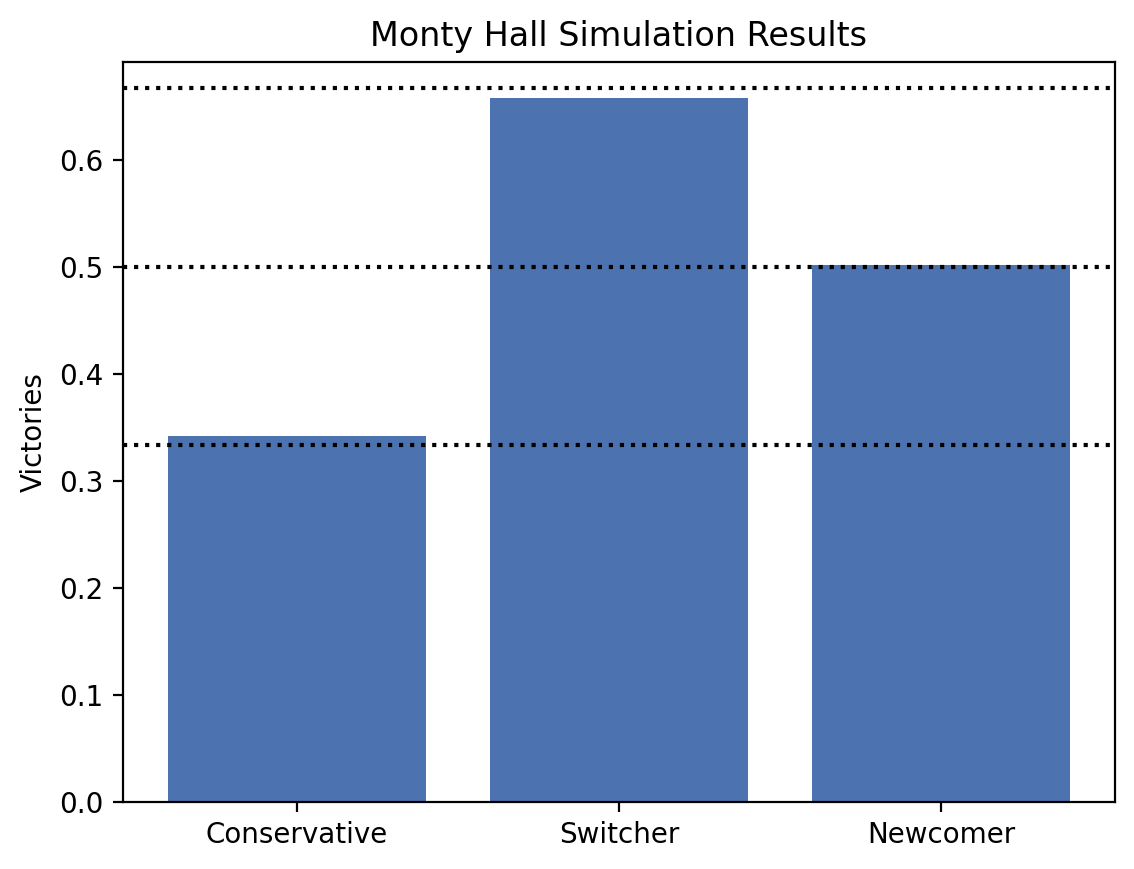

[0.342  0.658  0.5012]


In [5]:
N = 10000
montyhall_N = montyhall(N)

plt.bar([0,1,2], montyhall_N/N)
plt.xticks([0, 1, 2], ['Conservative', 'Switcher', 'Newcomer'])
for y in [1/3,2/3,1/2]:
    plt.axhline(y, ls='dotted',c='black')
#plt.xlabel('Player')
plt.ylabel('Victories')
plt.title('Monty Hall Simulation Results')
plt.show()

print(montyhall_N/N)

### Generalize for M doors

In [9]:
def montyhall(N, M):
    victories = np.zeros(3)  # Victories for conservative, switcher, and newcomer

    for n in tqdm(range(N)):
        enumerate_doors = np.arange(M)
        doors = np.zeros(M)
        car_door = np.random.choice(enumerate_doors)
        doors[car_door] = 1

        P1 = np.random.choice(enumerate_doors)   # Conservative
        remaining_doors = np.delete(enumerate_doors, P1) # Exclude the door chosen by the conservative 

        while np.size(remaining_doors) > 1: 
            monty_choice = np.random.choice(enumerate_doors)
            if doors[monty_choice] == 0: remaining_doors = np.delete(remaining_doors, np.where(remaining_doors == monty_choice))
        
        P2 = remaining_doors[0]

        P3 = np.random.choice([remaining_doors[0], P1])

        # Update victories
        if doors[P1] == 1: victories[0] += 1  # Conservative
        if doors[P2] == 1: victories[1] += 1  # Switcher
        if doors[P3] == 1: victories[2] += 1  # Newcomer

    return victories

100%|████████████████████████████████████| 10000/10000 [00:40<00:00, 245.16it/s]


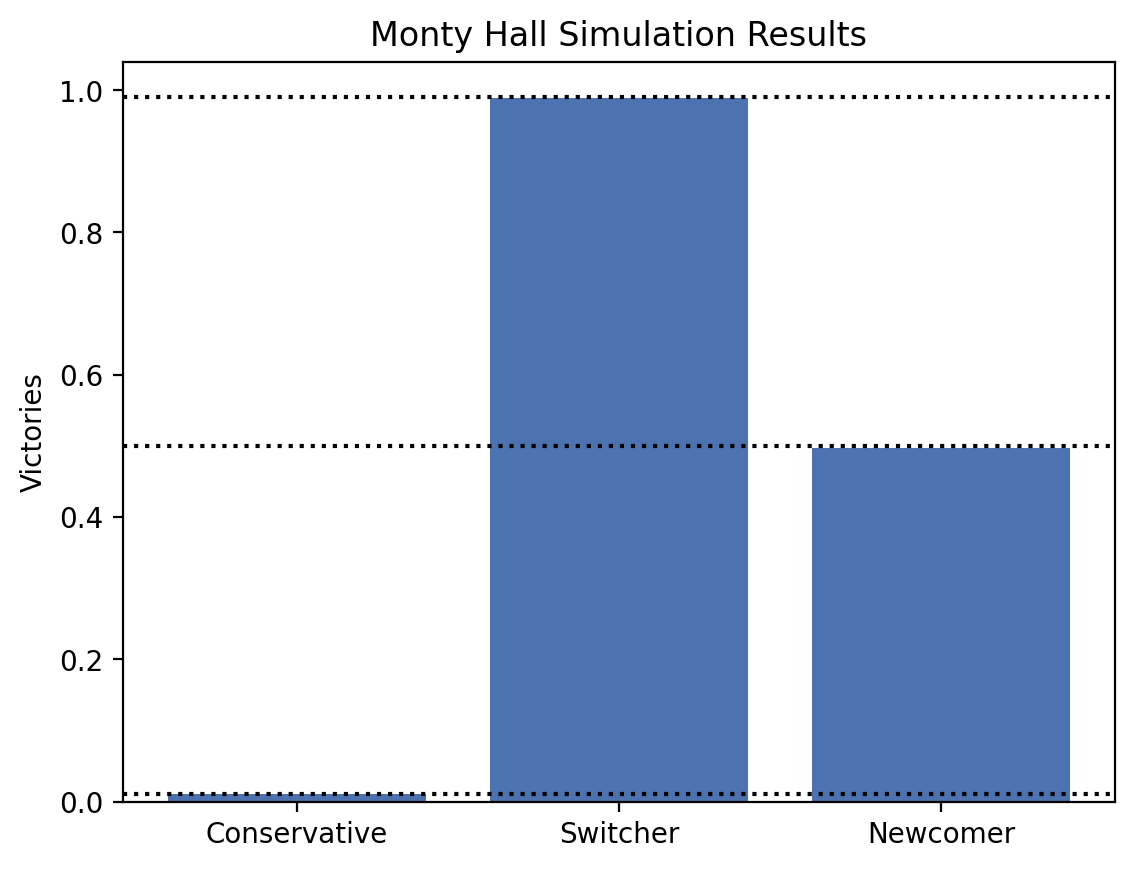

[0.0103 0.9897 0.4964]


In [10]:
N = 10000
M = 100
montyhall_N = montyhall(N,M)

plt.bar([0,1,2], montyhall_N/N)
plt.xticks([0, 1, 2], ['Conservative', 'Switcher', 'Newcomer'])
for y in [1/M,(M-1)/M,1/2]:
    plt.axhline(y, ls='dotted',c='black')
#plt.xlabel('Player')
plt.ylabel('Victories')
plt.title('Monty Hall Simulation Results')
plt.show()

print(montyhall_N/N)